In [1]:
import numpy as np
import pandas as pd

#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


train = pd.read_csv("/Users/vamseemuppavarapu/Desktop/Python-MachineLearning-NCU/Day-3-Machine-Learning/Logistic Regression/titanic-dataset/train.csv")
test = pd.read_csv("/Users/vamseemuppavarapu/Desktop/Python-MachineLearning-NCU/Day-3-Machine-Learning/Logistic Regression/titanic-dataset/test.csv")

#take a look at the training data
train.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Lovell, Mr. John Hall (""Henry"")",male,NaN,NaN,NaN,CA. 2343,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [2]:
print(train.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [3]:
"""Numerical Features: Age (Continuous), Fare (Continuous), SibSp (Discrete), Parch (Discrete)
Categorical Features: Survived, Sex, Embarked, Pclass
Alphanumeric Features: Ticket, Cabin"""
"""There are 177 NaN values in Age and also there are """
print(pd.isnull(train).sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


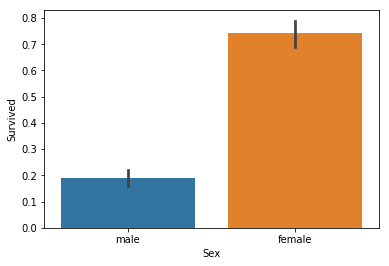

In [4]:
# Chances of surviving for females were higher than males. 
sns.barplot(x="Sex", y="Survived", data=train)

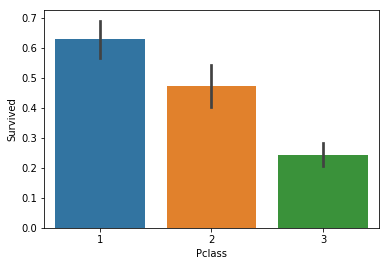

In [5]:
# people who survived depending on the class in which they travelled.
sns.barplot(x="Pclass", y="Survived", data=train)

Percentage of SibSp = 0 who survived: 34.53947368421053
Percentage of SibSp = 1 who survived: 53.588516746411486
Percentage of SibSp = 2 who survived: 46.42857142857143


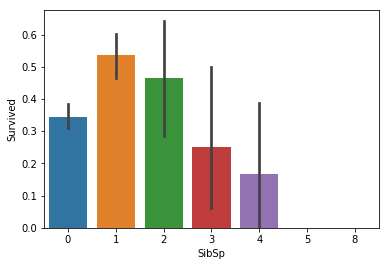

In [6]:
# people who survived with siblings and spouses.
"""In general, it's clear that people with more siblings or spouses aboard were less likely to survive. 
However, contrary to expectations, people with no siblings or spouses were less to likely to survive than those with one or two. 
(34.5% vs 53.4% vs. 46.4%)"""
sns.barplot(x="SibSp", y="Survived", data=train)
print("Percentage of SibSp = 0 who survived:", train["Survived"][train["SibSp"] == 0].value_counts(normalize = True)[1]*100)

print("Percentage of SibSp = 1 who survived:", train["Survived"][train["SibSp"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of SibSp = 2 who survived:", train["Survived"][train["SibSp"] == 2].value_counts(normalize = True)[1]*100)

In [7]:
#replacing all NaN values in age with the median
train["Age"] = train["Age"].fillna(train["Age"].median())
test["Age"] = test["Age"].fillna(test["Age"].median())

In [8]:
print("Number of people embarking in Southampton (S):")
southampton = train[train["Embarked"] == "S"].shape[0]
print(southampton)

print("Number of people embarking in Cherbourg (C):")
cherbourg = train[train["Embarked"] == "C"].shape[0]
print(cherbourg)

print("Number of people embarking in Queenstown (Q):")
queenstown = train[train["Embarked"] == "Q"].shape[0]
print(queenstown)

Number of people embarking in Southampton (S):
644
Number of people embarking in Cherbourg (C):
168
Number of people embarking in Queenstown (Q):
77


In [9]:
# as many people has boarded from southhampton lets replace the NaN values with that.
train = train.fillna({"Embarked": "S"})

In [10]:
# replacing all NaN values of Pclass to its mode.
train["Pclass"] = train["Pclass"].fillna(train["Pclass"].mode())

In [11]:
# drop features which are not necessary
train = train.drop(['Cabin'], axis = 1)
test = test.drop(['Cabin'], axis = 1)

In [12]:
train = train.drop(['Ticket'], axis = 1)
test = test.drop(['Ticket'], axis = 1)

In [13]:
train = train.drop(['Name'], axis = 1)
test = test.drop(['Name'], axis = 1)

In [14]:
sex_mapping = {"male": 0, "female": 1}
train['Sex'] = train['Sex'].map(sex_mapping)
test['Sex'] = test['Sex'].map(sex_mapping)

train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,S
1,2,1,1,1,38.0,1,0,71.2833,C
2,3,1,3,1,26.0,0,0,7.9250,S
3,4,1,1,1,35.0,1,0,53.1000,S
4,5,0,3,0,35.0,0,0,8.0500,S


In [15]:
#changing the embarked data from categorical to numerical.
embarked_mapping = {"S": 1, "C": 2, "Q": 3}
train['Embarked'] = train['Embarked'].map(embarked_mapping)
test['Embarked'] = test['Embarked'].map(embarked_mapping)

train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,1
1,2,1,1,1,38.0,1,0,71.2833,2
2,3,1,3,1,26.0,0,0,7.9250,1
3,4,1,1,1,35.0,1,0,53.1000,1
4,5,0,3,0,35.0,0,0,8.0500,1


In [16]:
train = train.drop(['Fare'], axis = 1)
test = test.drop(['Fare'], axis = 1)
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,0,3,0,22.0,1,0,1
1,2,1,1,1,38.0,1,0,2
2,3,1,3,1,26.0,0,0,1
3,4,1,1,1,35.0,1,0,1
4,5,0,3,0,35.0,0,0,1


In [17]:
train = train.drop(['PassengerId'], axis = 1)
#test = test.drop(['PassengerId'], axis = 1)
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,0,22.0,1,0,1
1,1,1,1,38.0,1,0,2
2,1,3,1,26.0,0,0,1
3,1,1,1,35.0,1,0,1
4,0,3,0,35.0,0,0,1


In [18]:
#check test data
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked
0,892,3,0,34.5,0,0,3
1,893,3,1,47.0,1,0,1
2,894,2,0,62.0,0,0,3
3,895,3,0,27.0,0,0,1
4,896,3,1,22.0,1,1,1


In [21]:
from sklearn.model_selection import train_test_split

predictors = train.drop(['Survived'], axis=1)
#print(predictors)
target = train["Survived"]
x_train, x_val, y_train, y_val = train_test_split(predictors, target, test_size = 0.22, random_state = 0)


In [28]:
from sklearn import tree
model = tree.DecisionTreeClassifier(criterion='entropy')
model.fit(x_train, y_train)


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [29]:
model.score(x_train, y_train)

0.9423631123919308

In [30]:
y_pred = model.predict(x_val)
y_pred

array([0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0])

In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_val,y_pred))

             precision    recall  f1-score   support

          0       0.84      0.86      0.85       124
          1       0.75      0.71      0.73        73

avg / total       0.81      0.81      0.81       197



In [27]:
print(test)
ids = test['PassengerId']
predictions = model.predict(test.drop('PassengerId', axis=1))
#print(predictions)
#set the output as a dataframe and convert to csv file named submission.csv
output = pd.DataFrame({ 'PassengerId' : ids, 'Survived': predictions })
print(output)

     PassengerId  Pclass  Sex   Age  SibSp  Parch  Embarked
0            892       3    0  34.5      0      0         3
1            893       3    1  47.0      1      0         1
2            894       2    0  62.0      0      0         3
3            895       3    0  27.0      0      0         1
4            896       3    1  22.0      1      1         1
5            897       3    0  14.0      0      0         1
6            898       3    1  30.0      0      0         3
7            899       2    0  26.0      1      1         1
8            900       3    1  18.0      0      0         2
9            901       3    0  21.0      2      0         1
10           902       3    0  27.0      0      0         1
11           903       1    0  46.0      0      0         1
12           904       1    1  23.0      1      0         1
13           905       2    0  63.0      1      0         1
14           906       1    1  47.0      1      0         1
15           907       2    1  24.0     